<a href="https://colab.research.google.com/github/worldwidekatie/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



##1) Write a function
`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):`

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an **8% false positive rate**, a **100% true positive rate**, and that our **prior belief about drunk driving in the population is 1/1000**.

In [0]:
def prob_drunk(p_drunk, false_pos, true_pos):
  p_not_drunk = 1-p_drunk
  numerator = (true_pos*p_drunk)
  denominator = (true_pos*p_drunk) + (false_pos*p_not_drunk)
  output = numerator/denominator
  return output

###What is the probability that a person is drunk after one positive breathalyzer test?

In [15]:
#After one breathalyzer we're 33.44% certain.
prob_drunk(1/200, 1/100, 1)

0.33444816053511706

###What is the probability that a person is drunk after two positive breathalyzer tests?

In [13]:
#After a second breathalyzer we're 86.26% certain.
prob_drunk(.3344, .08, 1)

0.8626382697705134

###How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [14]:
#After a third breathalyzer we're 98.74% certain
#So three positive tests gets probably > 95%.
prob_drunk(.8626, .08, 1)

0.987417467192923

##2) Explore `scipy.stats.bayes_mvs`
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

**Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach.** (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. 

In [0]:
#Using the budget votes dataset again
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 names=['party', 'handicapped-infants', 'water-project', 
                        'budget', 'physician-fee-freeze', 'el-salvador-aid', 
                        'religious-groups', 'anti-satellite-ban', 
                        'aid-to-contras', 'mx-missile', 'immigration', 
                        'synfuels', 'education', 'right-to-sue', 
                        'crime', 'duty-free', 'south-africa'])
import numpy as np
df = df.replace({"y": 1, "n": 0, "?": np.NaN})
df1 = df['budget']
df1 = df1.dropna()

In [0]:
#Using the function for the confidence interval from the last assignment
from scipy import stats
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  #Because we're using numpy and want the sample not the population
  s = data.std(ddof=1)  
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error )

In [24]:
mean, lower, upper = confidence_interval(df1)

print(mean)
print(lower)
print(upper)

0.5966981132075472
0.5498151808536169
0.6435810455614774


In [21]:
#Bayes
stats.bayes_mvs(df1, alpha=.95)

(Mean(statistic=0.5966981132075472, minmax=(0.5498151808536169, 0.6435810455614774)),
 Variance(statistic=0.2423643167660109, minmax=(0.2117453804193319, 0.27733816120505245)),
 Std_dev(statistic=0.4920128497210816, minmax=(0.46015799506183946, 0.5266290546533228)))

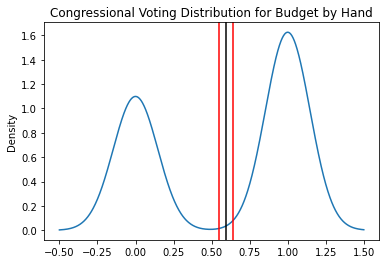

In [31]:
#Plot from last time in order to compare to bayes
import matplotlib.pyplot as plt

CI= confidence_interval(df1)

df1.plot.density()
plt.title("Congressional Voting Distribution for Budget by Hand")
plt.axvline(x=CI[1], color='red')
#CI[1] = 0.5498151808536169
plt.axvline(x=CI[0], color='black')
#CI[0] = 0.5966981132075472
plt.axvline(x=CI[2], color='red')
#CI[0] = 0.6435810455614774
plt.show()

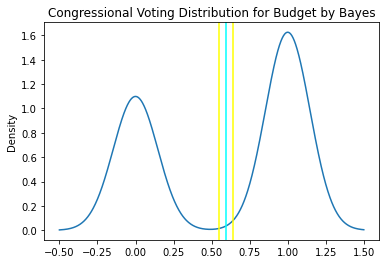

In [32]:
#for Bayes
df1.plot.density()
plt.title("Congressional Voting Distribution for Budget by Bayes")
plt.axvline(x=0.5498151808536169, color='yellow', label='lower')
#Lowerbound is the same as by hand
plt.axvline(x=0.5966981132075472, color='cyan')
#Mean is the same as by hand
plt.axvline(x=0.6435810455614774, color='yellow')
#Upper bound is the same as by hand
plt.show()

The Problem is, as you can see from the code, the means and confidence intervals are identical so I can't really plot them together because they overlap. The plots are identical except for the colors and that's only because I changed them for dramatic effect.

##3) In your own words, summarize the difference between Bayesian and Frequentist statistics

The difference between Bayesian and Frequentist statistics is frequentist statistics starts from scratch every time and bayesian takes into account known and learned information.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!